In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv(r'resume_ranking_cv.csv')

In [13]:
df.head()

,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100


In [51]:
df['Education'].unique()

array(['B.Sc', 'Master', 'B.Tech', 'PhD', 'M.Tech'], dtype=object)

In [24]:
#Education:
# phd-->Doctorat
# MBA-->Master
# b.sc--> Licence
# b.tech--> Diplôme d'Ingénieur
# m.tech--> Master

# certification:
# Deep_learning ---> AI
# AWS certif ---> AWS


# Job Role :
# AI Researcher'---> AI
# 'Data Scientist'--> Data Scientist
# Cybersecurity Analyst--> Cybersecurity 
# Software Engineer --->Software Engineer

#Skills	: str 'python ,Deep learning....'
#Experience (Years) : int
#Projects Count :int (0--10)

# order(Skills,Experience (Years),Education,Certifications,Job Role,Projects Count)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_ID               1000 non-null   int64 
 1   Name                    1000 non-null   object
 2   Skills                  1000 non-null   object
 3   Experience (Years)      1000 non-null   int64 
 4   Education               1000 non-null   object
 5   Certifications          726 non-null    object
 6   Job Role                1000 non-null   object
 7   Recruiter Decision      1000 non-null   object
 8   Salary Expectation ($)  1000 non-null   int64 
 9   Projects Count          1000 non-null   int64 
 10  AI Score (0-100)        1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [27]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Resume_ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Experience (Years),1000.0,4.896,3.112695,0.0,2.00,5.0,8.00,10.0
Salary Expectation ($),1000.0,79994.486,23048.472549,40085.0,60415.75,79834.5,99583.25,119901.0
Projects Count,1000.0,5.133,3.231370,0.0,2.00,5.0,8.00,10.0
AI Score (0-100),1000.0,83.950,20.983036,15.0,70.00,100.0,100.00,100.0


In [28]:
df.set_index('Resume_ID')

,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
Resume_ID,,,,,,,,,,
1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100
...,...,...,...,...,...,...,...,...,...,...
996,Brenda Williams,"Cybersecurity, Linux, Ethical Hacking",0,B.Sc,NaN,Cybersecurity Analyst,Reject,114364,9,60
997,Colleen Hicks,"Deep Learning, Machine Learning",0,MBA,Deep Learning Specialization,Data Scientist,Reject,103294,5,45
998,Michelle Molina,"TensorFlow, NLP",0,B.Tech,Google ML,AI Researcher,Hire,113855,9,65


In [38]:
df1 = df

In [39]:
df1

,Resume_ID,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Projects Count
0,1,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,8
1,2,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,1
2,3,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,7
3,4,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,0
4,5,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,9
...,...,...,...,...,...,...,...,...
995,996,"Cybersecurity, Linux, Ethical Hacking",0,B.Sc,NaN,Cybersecurity Analyst,Reject,9
996,997,"Deep Learning, Machine Learning",0,MBA,Deep Learning Specialization,Data Scientist,Reject,5
997,998,"TensorFlow, NLP",0,B.Tech,Google ML,AI Researcher,Hire,9
998,999,"Linux, Networking, Cybersecurity, Ethical Hacking",8,PhD,AWS Certified,Cybersecurity Analyst,Hire,10


In [41]:
df = df.drop(['Skills'],axis=1)

In [42]:
df.isnull().sum()

Resume_ID               0
Experience (Years)      0
Education               0
Certifications        274
Job Role                0
Recruiter Decision      0
Projects Count          0
dtype: int64

In [43]:
df

,Resume_ID,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Projects Count
0,1,10,B.Sc,NaN,AI Researcher,Hire,8
1,2,10,MBA,Google ML,Data Scientist,Hire,1
2,3,1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,7
3,4,7,B.Tech,AWS Certified,AI Researcher,Hire,0
4,5,4,PhD,NaN,Software Engineer,Hire,9
...,...,...,...,...,...,...,...
995,996,0,B.Sc,NaN,Cybersecurity Analyst,Reject,9
996,997,0,MBA,Deep Learning Specialization,Data Scientist,Reject,5
997,998,0,B.Tech,Google ML,AI Researcher,Hire,9
998,999,8,PhD,AWS Certified,Cybersecurity Analyst,Hire,10


In [46]:
df = df.set_index('Resume_ID')

In [47]:
df

,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Projects Count
Resume_ID,,,,,,
1,10,B.Sc,NaN,AI Researcher,Hire,8
2,10,MBA,Google ML,Data Scientist,Hire,1
3,1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,7
4,7,B.Tech,AWS Certified,AI Researcher,Hire,0
5,4,PhD,NaN,Software Engineer,Hire,9
...,...,...,...,...,...,...
996,0,B.Sc,NaN,Cybersecurity Analyst,Reject,9
997,0,MBA,Deep Learning Specialization,Data Scientist,Reject,5
998,0,B.Tech,Google ML,AI Researcher,Hire,9


In [48]:
#Education:
# phd-->Doctorat
# MBA-->Master
# b.sc--> Licence
# b.tech--> Diplôme d'Ingénieur
# m.tech--> Master

# certification:
# Deep_learning ---> AI
# AWS certif ---> AWS


# Job Role :
# AI Researcher'---> AI
# 'Data Scientist'--> Data Scientist
# Cybersecurity Analyst--> Cybersecurity 
# Software Engineer --->Software Engineer

#Skills	: str 'python ,Deep learning....'
#Experience (Years) : int
#Projects Count :int (0--10)

# order(Skills,Experience (Years),Education,Certifications,Job Role,Projects Count)

In [63]:
mapping = {'Doctorat':'doctorat','Master':'master','Licence':'licence',"Diplôme d'Ingénieur":"diplôme d'ingénieur",'Master':'master'}
df['Education'] = df['Education'].replace(mapping)

In [64]:
df

,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Projects Count
Resume_ID,,,,,,
1,10,licence,NaN,AI Researcher,Hire,8
2,10,master,Google ML,Data Scientist,Hire,1
3,1,master,Deep Learning Specialization,Cybersecurity Analyst,Hire,7
4,7,diplôme d'ingénieur,AWS Certified,AI Researcher,Hire,0
5,4,doctorat,NaN,Software Engineer,Hire,9
...,...,...,...,...,...,...
996,0,licence,NaN,Cybersecurity Analyst,Reject,9
997,0,master,Deep Learning Specialization,Data Scientist,Reject,5
998,0,diplôme d'ingénieur,Google ML,AI Researcher,Hire,9


In [55]:
df['Certifications'].unique()

array([nan, 'Google ML', 'Deep Learning Specialization', 'AWS Certified'],
      dtype=object)

In [65]:
mapping = {'Google ML':'google','Deep Learning Specialization':'ai','AWS Certified':'aws'}
df['Certifications'] = df['Certifications'].replace(mapping)

In [66]:
df

,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Projects Count
Resume_ID,,,,,,
1,10,licence,NaN,AI Researcher,Hire,8
2,10,master,google,Data Scientist,Hire,1
3,1,master,ai,Cybersecurity Analyst,Hire,7
4,7,diplôme d'ingénieur,aws,AI Researcher,Hire,0
5,4,doctorat,NaN,Software Engineer,Hire,9
...,...,...,...,...,...,...
996,0,licence,NaN,Cybersecurity Analyst,Reject,9
997,0,master,ai,Data Scientist,Reject,5
998,0,diplôme d'ingénieur,google,AI Researcher,Hire,9


In [75]:
df['Certifications'].unique()

array([nan, 'google', 'ai', 'aws'], dtype=object)

In [68]:
mapping = {'AI Researcher':'ai','Data Scientist':'data science','Cybersecurity Analyst':'cybersecurity '}
df['Job Role'] = df['Job Role'].replace(mapping)

In [69]:
df

,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Projects Count
Resume_ID,,,,,,
1,10,licence,NaN,ai,Hire,8
2,10,master,google,data science,Hire,1
3,1,master,ai,cybersecurity,Hire,7
4,7,diplôme d'ingénieur,aws,ai,Hire,0
5,4,doctorat,NaN,Software Engineer,Hire,9
...,...,...,...,...,...,...
996,0,licence,NaN,cybersecurity,Reject,9
997,0,master,ai,data science,Reject,5
998,0,diplôme d'ingénieur,google,ai,Hire,9


In [70]:
df.head(20)

,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Projects Count
Resume_ID,,,,,,
1,10,licence,NaN,ai,Hire,8
2,10,master,google,data science,Hire,1
3,1,master,ai,cybersecurity,Hire,7
4,7,diplôme d'ingénieur,aws,ai,Hire,0
5,4,doctorat,NaN,Software Engineer,Hire,9
6,10,diplôme d'ingénieur,google,cybersecurity,Hire,5
7,4,master,aws,cybersecurity,Hire,9
8,3,master,aws,ai,Hire,7
9,7,master,ai,cybersecurity,Hire,3


<Axes: xlabel='Recruiter Decision', ylabel='count'>

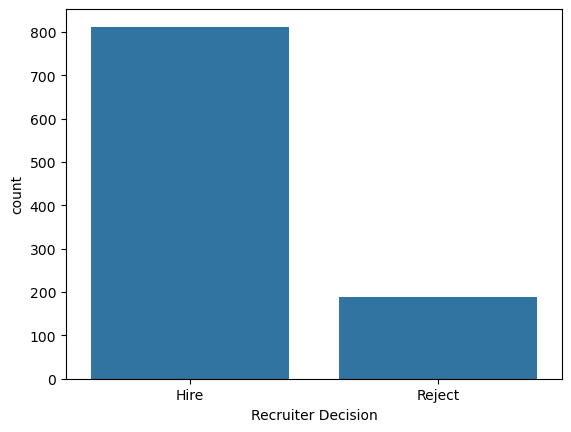

In [72]:
sns.countplot(data=df,x='Recruiter Decision')

In [76]:
pip install imbalanced-learn


In [88]:
df = pd.get_dummies(data=df,columns=['Education','Certifications','Job Role'],drop_first=True)

In [89]:
df

,Experience (Years),Projects Count,Education_diplôme d'ingénieur,Education_doctorat,Education_licence,Education_master,Certifications_ai,Certifications_aws,Certifications_google,Job Role_Software Engineer,Job Role_ai,Job Role_cybersecurity,Job Role_data science,Recruiter Decision_Reject
Resume_ID,,,,,,,,,,,,,,
1,10,8,False,False,True,False,False,False,False,False,True,False,False,False
2,10,1,False,False,False,True,False,False,True,False,False,False,True,False
3,1,7,False,False,False,True,True,False,False,False,False,True,False,False
4,7,0,True,False,False,False,False,True,False,False,True,False,False,False
5,4,9,False,True,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,9,False,False,True,False,False,False,False,False,False,True,False,True
997,0,5,False,False,False,True,True,False,False,False,False,False,True,True
998,0,9,True,False,False,False,False,False,True,False,True,False,False,False


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X = df.drop('Recruiter Decision',axis=1)

In [82]:
y=df['Recruiter Decision']